## KNN Assignment:

Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

Fundamental idea: combine multiple (diverse/weak) base models so their aggregated prediction is more accurate and robust than a single model. Ensembles reduce variance, bias, or both depending on the method.

Bagging (Bootstrap Aggregating):
- Build many base learners (same algorithm) on different bootstrap samples of the training set.
- Predictions are aggregated (majority vote for classification, average for regression).
- Objective: reduce variance and improve stability (e.g., Random Forest).
- Parallelizable (each model independent).

Boosting:
- Sequentially train models where each model focuses on the mistakes of previous models (re-weighting or pseudo-residuals).
- Combine weak learners into a strong learner (weighted sum).
- Objective: reduce bias (and sometimes variance), by correcting errors iteratively (e.g., AdaBoost, Gradient Boosting).
- Not parallel in the training step (sequential).



Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:  

Why Random Forest Reduces Overfitting
- Decision trees tend to overfit because they learn intricate patterns—even noise—from the training data.
- Random Forest builds multiple decision trees on different subsets of the data and averages their predictions (for regression) or uses majority voting (for classification). This ensemble approach smooths out individual tree biases and reduces variance, making the model more generalizable to unseen data.

 Two Key Hyperparameters :
Why Random Forest Reduces Overfitting
- Decision trees tend to overfit because they learn intricate patterns—even noise—from the training data.
- Random Forest builds multiple decision trees on different subsets of the data and averages their predictions (for regression) or uses majority voting (for classification).
- This ensemble approach smooths out individual tree biases and reduces variance, making the model more generalizable to unseen data.

Two key hyperparameters:

n_estimators — number of trees. More trees → lower variance (to a point), but more compute.

max_features — number of features considered at each split. Lower values increase randomness/decorrelation → less overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer:  
Stacking (stacked generalization):
- Train several base models (level-0). Use their predictions (often out-of-fold predictions on training data) as features to train a higher-level model (meta-learner, level-1) which learns how to combine base models.
- Handles diverse base learners and lets a meta-learner correct systematic mistakes.

Difference from bagging/boosting:

- Bagging: aggregates identical-type models trained on resampled data (reduce variance). Boosting: sequentially focuses on errors (reduce bias). Stacking: learns an optimal combination by training a second-level model on predictions (learned ensemble).

- Example use case: combine logistic regression, random forest, and SVM as base learners, and use a small XGBoost/linear model as meta-learner.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
Answer:

OOB (Out-Of-Bag) score:
- When building each tree, Random Forest uses bootstrap sampling—randomly selecting samples with replacement.
- About one-third of the data is left out of each tree’s training set. These are called Out-of-Bag samples.
- The model then predicts these OOB samples using the tree that didn’t train on them.
- The OOB Score is the average accuracy (or other metric) of these predictions across all trees.


Why useful:

- Provides internal validation estimate without a separate holdout set (efficient use of data).

- Good for quick model selection and checking overfitting during training.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer:  

How they handle errors:
- AdaBoost: reweights training samples—misclassified samples receive higher weights for next weak learner. Each learner tries to correct misclassified points.

- Gradient Boosting: fits each new learner to the negative gradient (residuals) of the loss function—each new model predicts the residual errors.

Weight adjustment mechanism:
- AdaBoost: adjusts sample weights explicitly and combines learners with weights based on their accuracy.
- Gradient Boosting: updates model by adding learners that minimize loss using gradient descent in function space; learning rate controls step size.

Typical use cases:
- AdaBoost: simple binary classification with weak learners (stumps).
- Gradient Boosting (e.g., XGBoost, LightGBM): structured tabular data with strong performance in competitions and industry (both classification & regression).

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:  

- CatBoost uses ordered target statistics and permutation-driven encoding to avoid target leakage, plus categorical feature combinations. It builds categorical handling into training rather than requiring one-hot/target encoding from the user.

- Techniques: ordered boosting (reduces target leakage), efficient categorical encodings (mean statistics with regularization), and automatic handling of categorical interactions.

- Result: often strong out-of-the-box performance on datasets with many categorical features and low need for manual preprocessing.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

Answers:



In [ ]:
# KNN classifier - wine dataset
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# load data set
wine = load_wine()
X = wine.data
y= wine.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42, stratify = y)

# knn classifier without scaling
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print(f'Unscaled KNN, Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Classification report (unscaled):\n{classification_report(y_test, y_pred)}')
print('\n----------------------------------------------------------------------------------------------------------------------------')
# knn classifier with scaling and retrain
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.transform(X_test)
knn_s = KNeighborsClassifier(n_neighbors=5)
knn_s.fit(X_train_s, y_train)
y_pred_s = knn_s.predict(X_test_s)

print(f'\nScaled KNN, Accuracy score: {accuracy_score(y_test, y_pred_s)}')
print(f'Classification report (scaled):\n{classification_report(y_test, y_pred_s)}')

print('\n----------------------------------------------------------------------------------------------------------------------------')
# knn with GridSearchCV
params = {
    'n_neighbors':list(range(1,21)),
    'metric':['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid= params, cv = 5, verbose = 3, n_jobs=-1)
grid.fit(X_train_s, y_train) # grid on scaling data
best_knn = grid.best_estimator_
y_best = best_knn.predict(X_test_s)
print("Best params from GridSearch:", grid.best_params_)
print(f'\n Best KNN, Accuracy score: {accuracy_score(y_test, y_best)}')
print(f'Classification report for best knn:\n{classification_report(y_test, y_best)}')


Unscaled KNN, Accuracy score: 0.7222222222222222
Classification report (unscaled):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


----------------------------------------------------------------------------------------------------------------------------

Scaled KNN, Accuracy score: 0.9444444444444444
Classification report (scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weig

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Answer:  


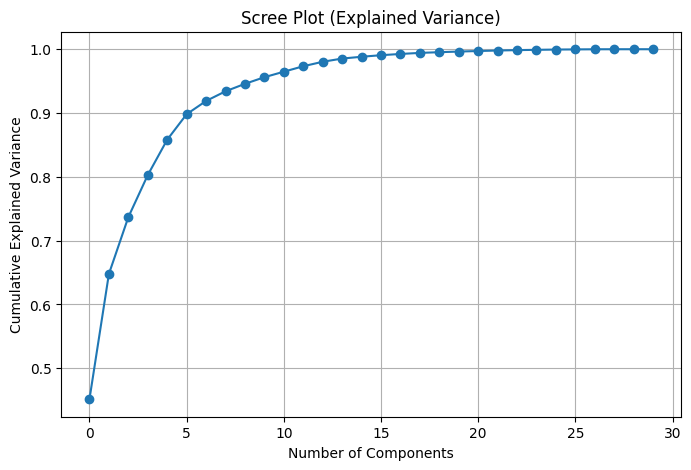

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_s)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_train_s)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance)')
plt.grid(True)
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Answer:

MSE (Euclidean, k=5): 4631.046671481758
MSE (Manhattan, k=5): 5241.903579748114


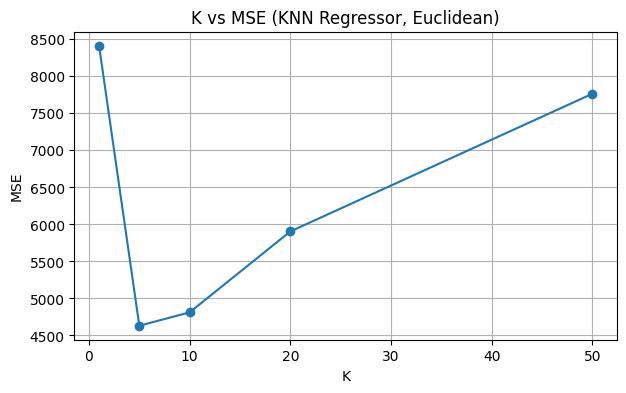

K=1: MSE=8414.0913
K=5: MSE=4631.0467
K=10: MSE=4811.7638
K=20: MSE=5904.7813
K=50: MSE=7764.1559


In [1]:
# KNN Regressor with Euclidean vs Manhattan & K vs MSE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. K=5 Euclidean (p=2) and Manhattan (p=1)
knn_euc = KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski')
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

knn_man = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski')
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print("MSE (Euclidean, k=5):", mse_euc)
print("MSE (Manhattan, k=5):", mse_man)

# 3. Test K in [1,5,10,20,50] and plot
Ks = [1, 5, 10, 20, 50]
mse_vals = []
for k in Ks:
    model = KNeighborsRegressor(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    mse_vals.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(7,4))
plt.plot(Ks, mse_vals, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('K vs MSE (KNN Regressor, Euclidean)')
plt.grid(True)
plt.show()

# Also print MSE table
for k, m in zip(Ks, mse_vals):
    print(f"K={k}: MSE={m:.4f}")


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes


Answer:

In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#1.load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
# few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# There are some columns which have 0 , but it is not possible. So i replace all zero's with np.Nan
cols = ['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']
for col in cols:
  df[col] = df[col].apply(lambda x: np.nan if x <= 0 else x)

# now checking the missing values:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
# 2. KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = .30, random_state = 42)

# 3. Train KNN using brute, kd_tree, ball_tree and compare time & accuracy
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []
for algo in algorithms:
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - t0
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((algo, train_time, acc))

# show results
for algo, t, acc in results:
    print(f"Algorithm: {algo:8s} | Train time: {t:.4f}s | Test accuracy: {acc:.4f}")

Algorithm: brute    | Train time: 0.0035s | Test accuracy: 0.7100
Algorithm: kd_tree  | Train time: 0.0038s | Test accuracy: 0.7100
Algorithm: ball_tree | Train time: 0.0024s | Test accuracy: 0.7100


In [6]:
# 4. Choose best-performing method (highest test accuracy; tie-breaker lowest time)
results_sorted = sorted(results, key=lambda x: (-x[2], x[1]))
best_algo = results_sorted[0][0]
print("Best algorithm:", best_algo)

Best algorithm: ball_tree


In [7]:
# 5. Plot decision boundary for best-performing method using 2 most important features
# Estimate feature importances using a RandomForest (simple heuristic)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top2 = list(importances.index[:2])
print("Top 2 features:", top2)

# Fit KNN with the best algo on only these two features
knn2 = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
X2_train = X_train[top2].values
X2_test = X_test[top2].values
knn2.fit(X2_train, y_train)

Top 2 features: ['Glucose', 'Insulin']


KNeighborsClassifier(algorithm='ball_tree')

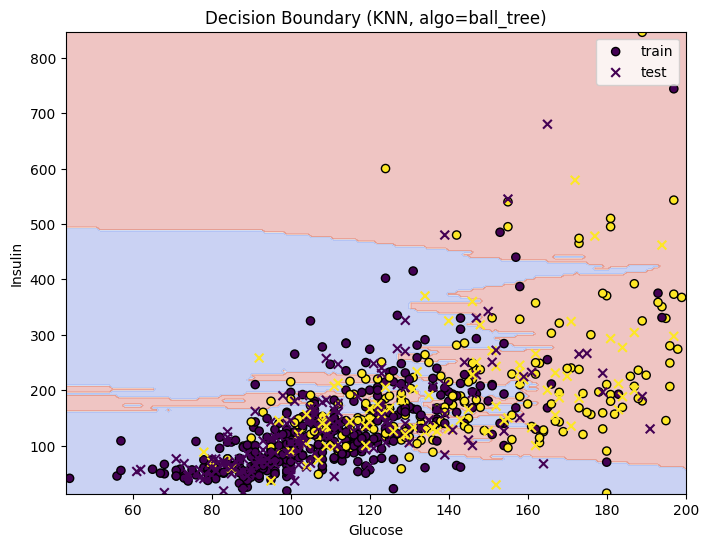

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# plot
h = 0.1

# find limits for both features
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1

# create smaller meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# predict class for each point in grid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y_train, edgecolor='k', s=35, label='train')
plt.scatter(X2_test[:,0], X2_test[:,1], c=y_test, marker='x', s=40, label='test')
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.title(f'Decision Boundary (KNN, algo={best_algo})')
plt.legend()
plt.show()
